# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [154]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

UsageError: Line magic function `%` not found.


### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

In [ ]:
# YOUR ANSWER HERE
import wave

signal_path = '/Users/daniil/Desktop/DSP/Labs/base/resources_2/safari.wav'
f = wave.open(signal_path, 'rb')
fr = f.getframerate()
f.getnframes()
# f.getframerate()
# f.getsampwidth()

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [ ]:
# YOUR ANSWER HERE
import IPython.display as ipd
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Resample and display 3 examples

In [ ]:
y, sr = librosa.load(signal_path, sr=44100)
sr_1 = 8000  # Telephone
sr_2 = 2000
sr_3 = 1000

print(f'original sampling rate: {sr}')

y_1 = librosa.resample(y, orig_sr=sr, target_sr=sr_1)
y_2 = librosa.resample(y, orig_sr=sr, target_sr=sr_2)
y_3 = librosa.resample(y, orig_sr=sr, target_sr=sr_3)

fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(10, 15))

for i, (y_draw, sr_draw) in enumerate(zip([y, y_1, y_2, y_3], [sr, sr_1, sr_2, sr_3])):
    librosa.display.waveshow(y_draw, sr=sr_draw, ax=ax[i])
    ax[i].set_title(f'SAMPLING RATE: {sr_draw}')

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

In [ ]:
# YOUR ANSWER HERE
# сжатием, хедерами

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [ ]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)  # толщина Линии
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round()) // 10 * 10,
                         (data.max().round()) // 10 * 10 + 10, step=5))
    plt.grid(which='major',
             color='k',
             linewidth=1)
    plt.grid(which='minor',
             color='k',
             linestyle=':')
    plt.show()

In [ ]:
# Читаем данные с подготовленными сигналами
import pickle

with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!
data_q = test_data['task2']['a']
plt.figure(figsize=(14, 14))
plt.minorticks_on()
plt.plot(data_q)
plt.xticks(np.arange(0, 1000, step=100))
plt.yticks(data_q.min().round(), data_q.max().round, step=5)
plt.show()

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

In [ ]:
draw_signal(test_data['task2']['a'])

In [ ]:
# YOUR CODE HERE
A = 45
w = 1 / 425
phi = 0
a = np.asarray([A * np.cos(2 * np.pi * w * x) + phi for x in range(1000)])

In [ ]:
draw_signal(a)

In [ ]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= $

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $

3. Фаза - $\phi= $

### Сигнал ***b***

In [ ]:
draw_signal(test_data['task2']['b'])
data = test_data['task2']['b']

In [155]:
data = test_data['task2']['b']
print(len(data))
# print(data)
print(data.max())
data = list(data)
data.index(max(data))

1000
50.0


25

In [175]:
# YOUR CODE HERE
A = 50
w = 1 / 100
phi = 0
b = np.asarray([A * np.sin(2 * np.pi * w * x) + phi for x in range(1000)])

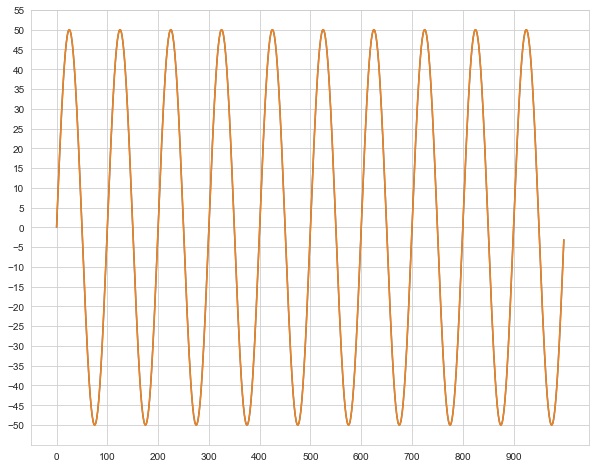

In [177]:
# draw_signal(test_data['task2']['b'])
# draw_signal(b)
b_ = test_data['task2']['b']
plt.figure(figsize=(10, 8))
plt.minorticks_on()
plt.xticks(np.arange(0, 1000, step=100))
plt.yticks(np.arange((min(data).round()) // 10 * 10,
                     (max(data).round()) // 10 * 10 + 10, step=5))
plt.plot(b_)
plt.plot(b)
plt.show()
# draw_signal(b)
# draw_signal(test_data['task2']['b'])

In [178]:
assert len(b) == 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= $

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $

3. Фаза - $\phi= $

### Сигнал ***c***

In [ ]:
draw_signal(test_data['task2']['c'])

In [181]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
c = a - b

In [182]:
assert len(c) == 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [222]:
# пока что не мой уровень :(

# input
a = [1, 2, 3]
b = [4, 5, 6, 7, 8]
N = len(a) + len(b) - 1
print(N)

# transform
a.extend(np.zeros(N - len(a), dtype=int))
b.extend(np.zeros(N - len(b), dtype=int))
b = b[::-1]

# visualize
sa = ' '.join(list(map(str, a)))
sb = ' '.join(list(map(str, b)))
print('' + sa)
print('            ' + sb)
print(a, b, sep='\n')
for i in range(N):
    np.dot(a[:i])

7
1 2 3 0 0 0 0
            0 0 8 7 6 5 4
[1, 2, 3, 0, 0, 0, 0]
[0, 0, 8, 7, 6, 5, 4]


In [232]:
a = 10
b = 20
if a < b: a, b = b, a
print(a, b)

20 10


In [240]:
a = [1, 2, 3]
b = [4, 5, 6, 7, 8]

list(np.convolve(a, b))

[ 4. 13. 16. 19. 14.  0.  0.]


[4, 13, 28, 34, 40, 37, 24]

In [242]:
def convolve(in1, in2):
    return np.convolve(in1, in2)

#YOUR CODE HERE

In [248]:
import scipy

def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [249]:
a = np.repeat([0, 1, 0], 10)
b = np.array([0, 1, 2, 3, 2, 1, 0])

In [250]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

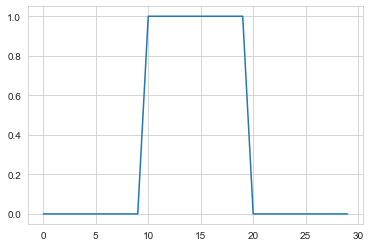

In [251]:
# YOUR CODE HERE
plt.plot(a)

Сигнал **b**

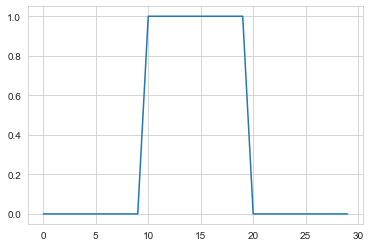

In [255]:
# YOUR CODE HERE
plt.plot(a)

Свертка **a** и **b**

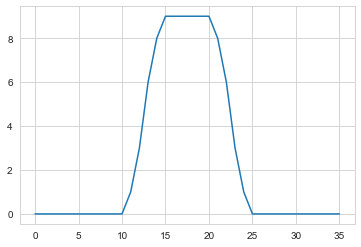

In [256]:
# YOUR CODE HERE
plt.plot(convolve(a, b))

Все 3 графика на одной картинке:

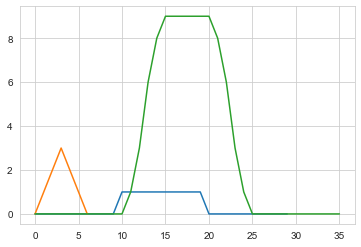

In [257]:
# YOUR CODE HERE
plt.plot(a)
plt.plot(b)
plt.plot(convolve(a, b))
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [ ]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE

    raise NotImplementedError()

In [ ]:
np.random.seed(seed=1)
sample_rate = 44100
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate / frequency)))  # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0]) / 2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise) + 1: 2 * len(noise)],
                   (noise[:-1] + noise[1:]) / 2), "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2 * len(noise)], (noise[0] / 2 + noise[-1]) / 2), "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2 * len(noise) + 2: 3 * len(noise)], (
        ((noise[:-1] + noise[1:]) / 2)[:-1] + ((noise[:-1] + noise[1:]) / 2)[
                                              1:]) / 2), "Bad requrent rule( 3 iteration)"
print('All Ok!')

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [ ]:
# YOUR CODE HERE

Визуализируем затухание амплитуды:

In [ ]:
plt.figure(figsize=(10, 5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len + 1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# YOUR CODE HERE